In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import user_testing_data

sns.set()

In [2]:
df = user_testing_data.load_data()
df.head(n=5)

,Code,Test,Tab,Center,L/B,Task,ST,CT,ToT,Init,CFA,aCFA,FS,FCA,CEDZ,Notes,source,target,position
0,TacoBullMonsterSurf,6,N,Y,B,1-2,2:22,2:29,7.0,G to RTDZ,G to RTDZ,G to TEDZ,0.0,NaN,NaN,Would have landed in TaDZ.,G,R,T
1,PopeyeVeganMonkeyMoogle,2,Y,Y,B,4-1,3:51,4:02,11.0,G to BBDZ,G to BEDZ,NaN,1.0,G to BEDZ,Y,Went to middle to find EDZ,G,B,B
2,FalseDonkey,1,Y,Y,L,4-1,4:12,4:44,32.0,G to REDZ,G to BEDZ,NaN,2.0,Messy Reorganize,Y,"Went to middle for EDZ. Tried to find EDZ, but...",G,E,R
3,SimpleNeptuneMachineDamage,5,N,Y,L,4-1,3:35,3:41,6.0,G to BEDZ,G to BEDZ,NaN,0.0,NaN,Y,Went to center for EDZ,G,E,B
4,HelloGoodbyeHelloHugo,4,Y,N,B,1-2,2:08,2:20,12.0,G to RTaDZ,G to RBDZ,NaN,1.0,G to RTDZ,NaN,"Was confused about how drop zones worked, felt...",G,R,Ta


# Should we add tabs dropzones?

## Accuracy with Tabs (did they fail?)

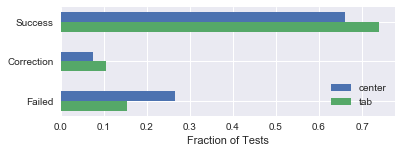

In [3]:
# Subset dataframes
with_tab = df[(df.Tab == 'Y') & (df.Center == 'N') & (df.FS.isin([0,1,2]))]
with_tab_total = len(with_tab)
with_center = df[(df.Tab == 'N') & (df.Center == 'Y') & (df.FS.isin([0,1,2]))]
with_center_total = len(with_center)

# Plot data
fig, ax = plt.subplots(figsize=(6,2))

y = np.array([0, 2, 4])
x = [
    len(with_tab[with_tab.FS == 2]) / with_tab_total, 
    len(with_tab[with_tab.FS == 1]) / with_tab_total, 
    len(with_tab[with_tab.FS == 0]) / with_tab_total, 
]

x2 = [
    len(with_center[with_center.FS == 2]) / with_center_total, 
    len(with_center[with_center.FS == 1]) / with_center_total, 
    len(with_center[with_center.FS == 0]) / with_center_total, 
]

ax.barh(y+.5, x2, height=0.5, align='edge', label="center")
ax.barh(y, x, height=0.5, align='edge', label="tab")

ax.set_yticks([0.5, 2.5, 4.5])
ax.set_yticklabels(["Failed", "Correction", "Success"])
ax.set_xlabel("Fraction of Tests")

ax.legend()

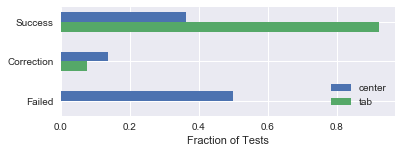

In [4]:
# Subset dataframes
filters = (
    (df.Tab == 'Y') &            # Tab is Y
    (df.Center == 'N') &         # Center is N
    (df.FS.isin([0,1,2])) &      # First success score.
    (df.Task.isin(['3-1', '3-2'])) # Must be Task 3
)
with_tab = df[filters]
with_tab_total = len(with_tab)


filters = (
    (df.Tab == 'N') &            # Tab is Y
    (df.Center == 'Y') &         # Center is N
    (df.FS.isin([0,1,2])) &       # First success score.
    (df.Task.isin(['3-1', '3-2'])) # Must be Task 3
)
with_center = df[filters]
with_center_total = len(with_center)

# Plot data
fig, ax = plt.subplots(figsize=(6,2))

y = np.array([0, 2, 4])
x = [
    len(with_tab[with_tab.FS == 2]) / with_tab_total, 
    len(with_tab[with_tab.FS == 1]) / with_tab_total, 
    len(with_tab[with_tab.FS == 0]) / with_tab_total, 
]

x2 = [
    len(with_center[with_center.FS == 2]) / with_center_total, 
    len(with_center[with_center.FS == 1]) / with_center_total, 
    len(with_center[with_center.FS == 0]) / with_center_total, 
]

ax.barh(y+.5, x2, height=0.5, align='edge', label="center")
ax.barh(y, x, height=0.5, align='edge', label="tab")

ax.set_yticks([0.5, 2.5, 4.5])
ax.set_yticklabels(["Failed", "Correction", "Success"])
ax.set_xlabel("Fraction of Tests")

ax.legend()

## Did tabs help improve speed?

Text(0.5,1,'Kernel density estimation')

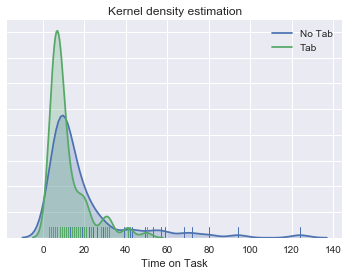

In [5]:
filters = (
    (df.Tab == "N") &       # Tab no
    (df.Center == "Y") &    # Center yes
    (df.ToT < 300)          # Remove outliers
)
notab_df = df[filters]

filters = (
    (df.Tab == "Y") &       # Tab yes
    (df.Center == "Y") &    # Center yes
    (df.ToT < 300)          # Remove outliers
)
tab_df = df[filters]


fig, ax = plt.subplots()

sns.distplot(notab_df.ToT.astype(float), ax=ax, rug=True, hist=False, kde_kws={"shade": True}, label="No Tab")
sns.distplot(tab_df.ToT.astype(float), ax=ax, rug=True, hist=False, kde_kws={"shade": True}, label="Tab")

ax.set_xlabel("Time on Task")
ax.set_yticklabels([])
ax.set_title("Kernel density estimation")
#x = ax.hist(notab_df.ToT.astype(float), bins=20)

## What did users use (center drop-zones or tabs)?

Text(0,0.5,'Number of Records')

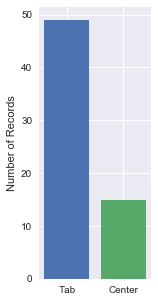

In [182]:
task_3 = df[(df.Task == "3-1") | (df.Task == "3-2")]

tab = len(task_3[task_3.position == "Ta"])
center = len(task_3[task_3.position.isin(["L", "R", "T", "C"])])

x = ["Tab", "Center"]
y = [tab, center]

fig, ax = plt.subplots(figsize=(2,5))
ax.bar(x, y, color=["C0", "C1"])
ax.set_ylabel("Number of Records")

# Should center DZs stay?